# Arbol de decisión

Un clasificador de árbol de decisión crea un árbol invertido para realizar predicciones. Comienza en la parte superior con una pregunta sobre una característica importante de los datos y luego se ramifica según las respuestas. A medida que se desciende por estas ramas, cada parada plantea una nueva pregunta, reduciendo las posibilidades. Este juego de preguntas y respuestas continúa hasta llegar al final (un nodo hoja), donde se obtiene la predicción o clasificación final.

## 🔍 Planteamiento del Problema

Se usa como ejemplo el conjunto de datos de golf artificial (inspirado en [1]). Este conjunto de datos predice si una persona jugará al golf en función de las condiciones meteorológicas.

Inforamcion extraida de : 
https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e/


## 📘 1. Importación de librerías necesarias

In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


## 📂 2. Carga y exploración inicial del dataset

In [8]:
# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)


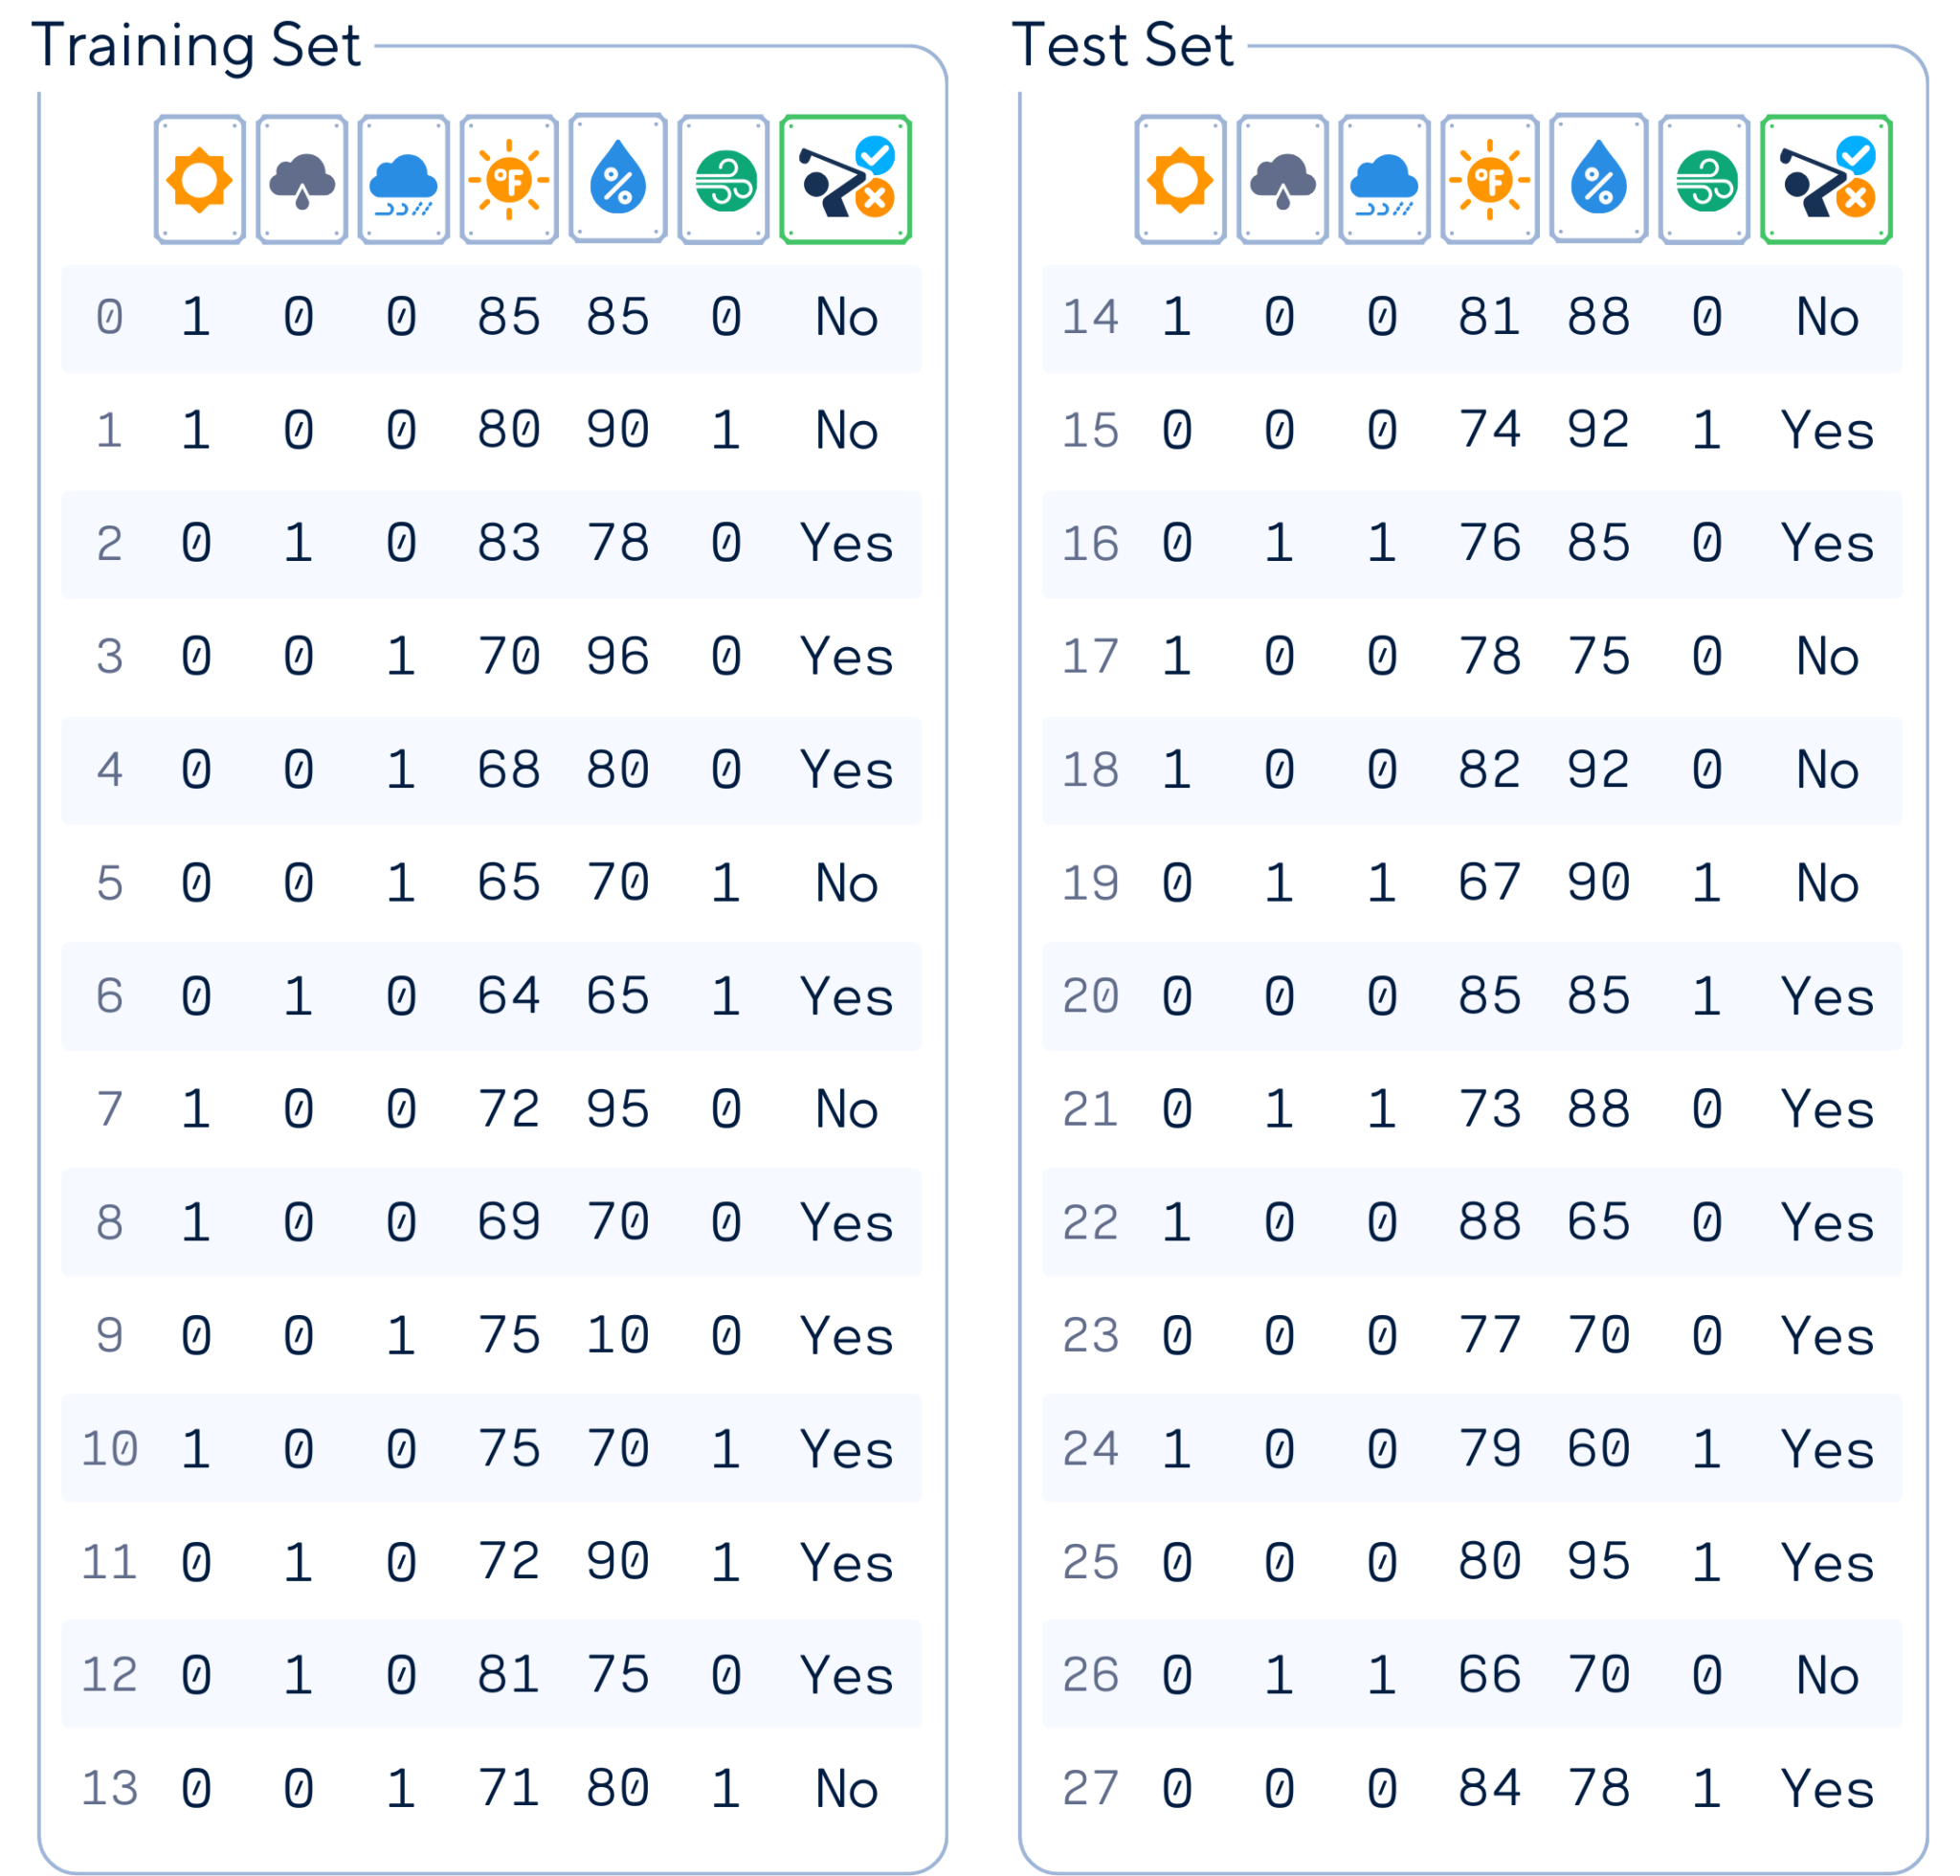

## 🧼 3. Limpieza y preprocesamiento de datos

In [9]:
# Preprocess data
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

## 🧪 4. Selección de variables predictoras (X) y variable objetivo (y)

In [10]:
# Reorder the columns
df = df[['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']]

# Prepare features and target
X, y = df.drop(columns='Play'), df['Play']

## ✂️ 5. División del dataset en entrenamiento y prueba

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

## 🌳 6. Entrenamiento del Árbol de Decisión

En Scikit-learn, el algoritmo de árbol de decisión se denomina CART (Árboles de Clasificación y Regresión). Construye árboles binarios y suele seguir estos pasos:

### 6.1. Comience con todas las muestras de entrenamiento en el nodo raíz.

Este paso no requiere una línea de código específica como una función explícita, sino que **se cumple en el momento en que trabajas con el conjunto completo de entrenamiento**, es decir, cuando comienzas a procesar **todas las muestras** (filas) de entrenamiento como un solo bloque de datos.

#### ✅ Línea que cumple ese punto:

```python
for column in X_train.columns:
```

Esta línea **itera sobre todas las columnas** del conjunto de entrenamiento `X_train`, y **para cada columna**, se evalúan los puntos de división **usando todos los valores disponibles** en esa columna, es decir, **todas las muestras** en ese nodo (el nodo raíz en este caso).

#### Complemento:

Si se quisiera expresar de forma explícita en pseudocódigo la idea del punto 1, sería algo como:

```python
nodo_actual = X_train.copy()  # ← Aquí se parte con todas las muestras en el nodo raíz
```

Pero en tu código, **la implicación de que estás usando todas las muestras del entrenamiento ocurre en**:

```python
X_train[column]
```

Y esa línea está contenida dentro de:

```python
for column in X_train.columns:
```

#### Por tanto, podemos decir:

> **📌 La línea que implementa el punto 1 (de forma implícita) es:**

```python
for column in X_train.columns:
```

Porque es donde comienzas el análisis con **todas las muestras de entrenamiento**, tal como lo indica el punto 1 del algoritmo de árboles de decisión.

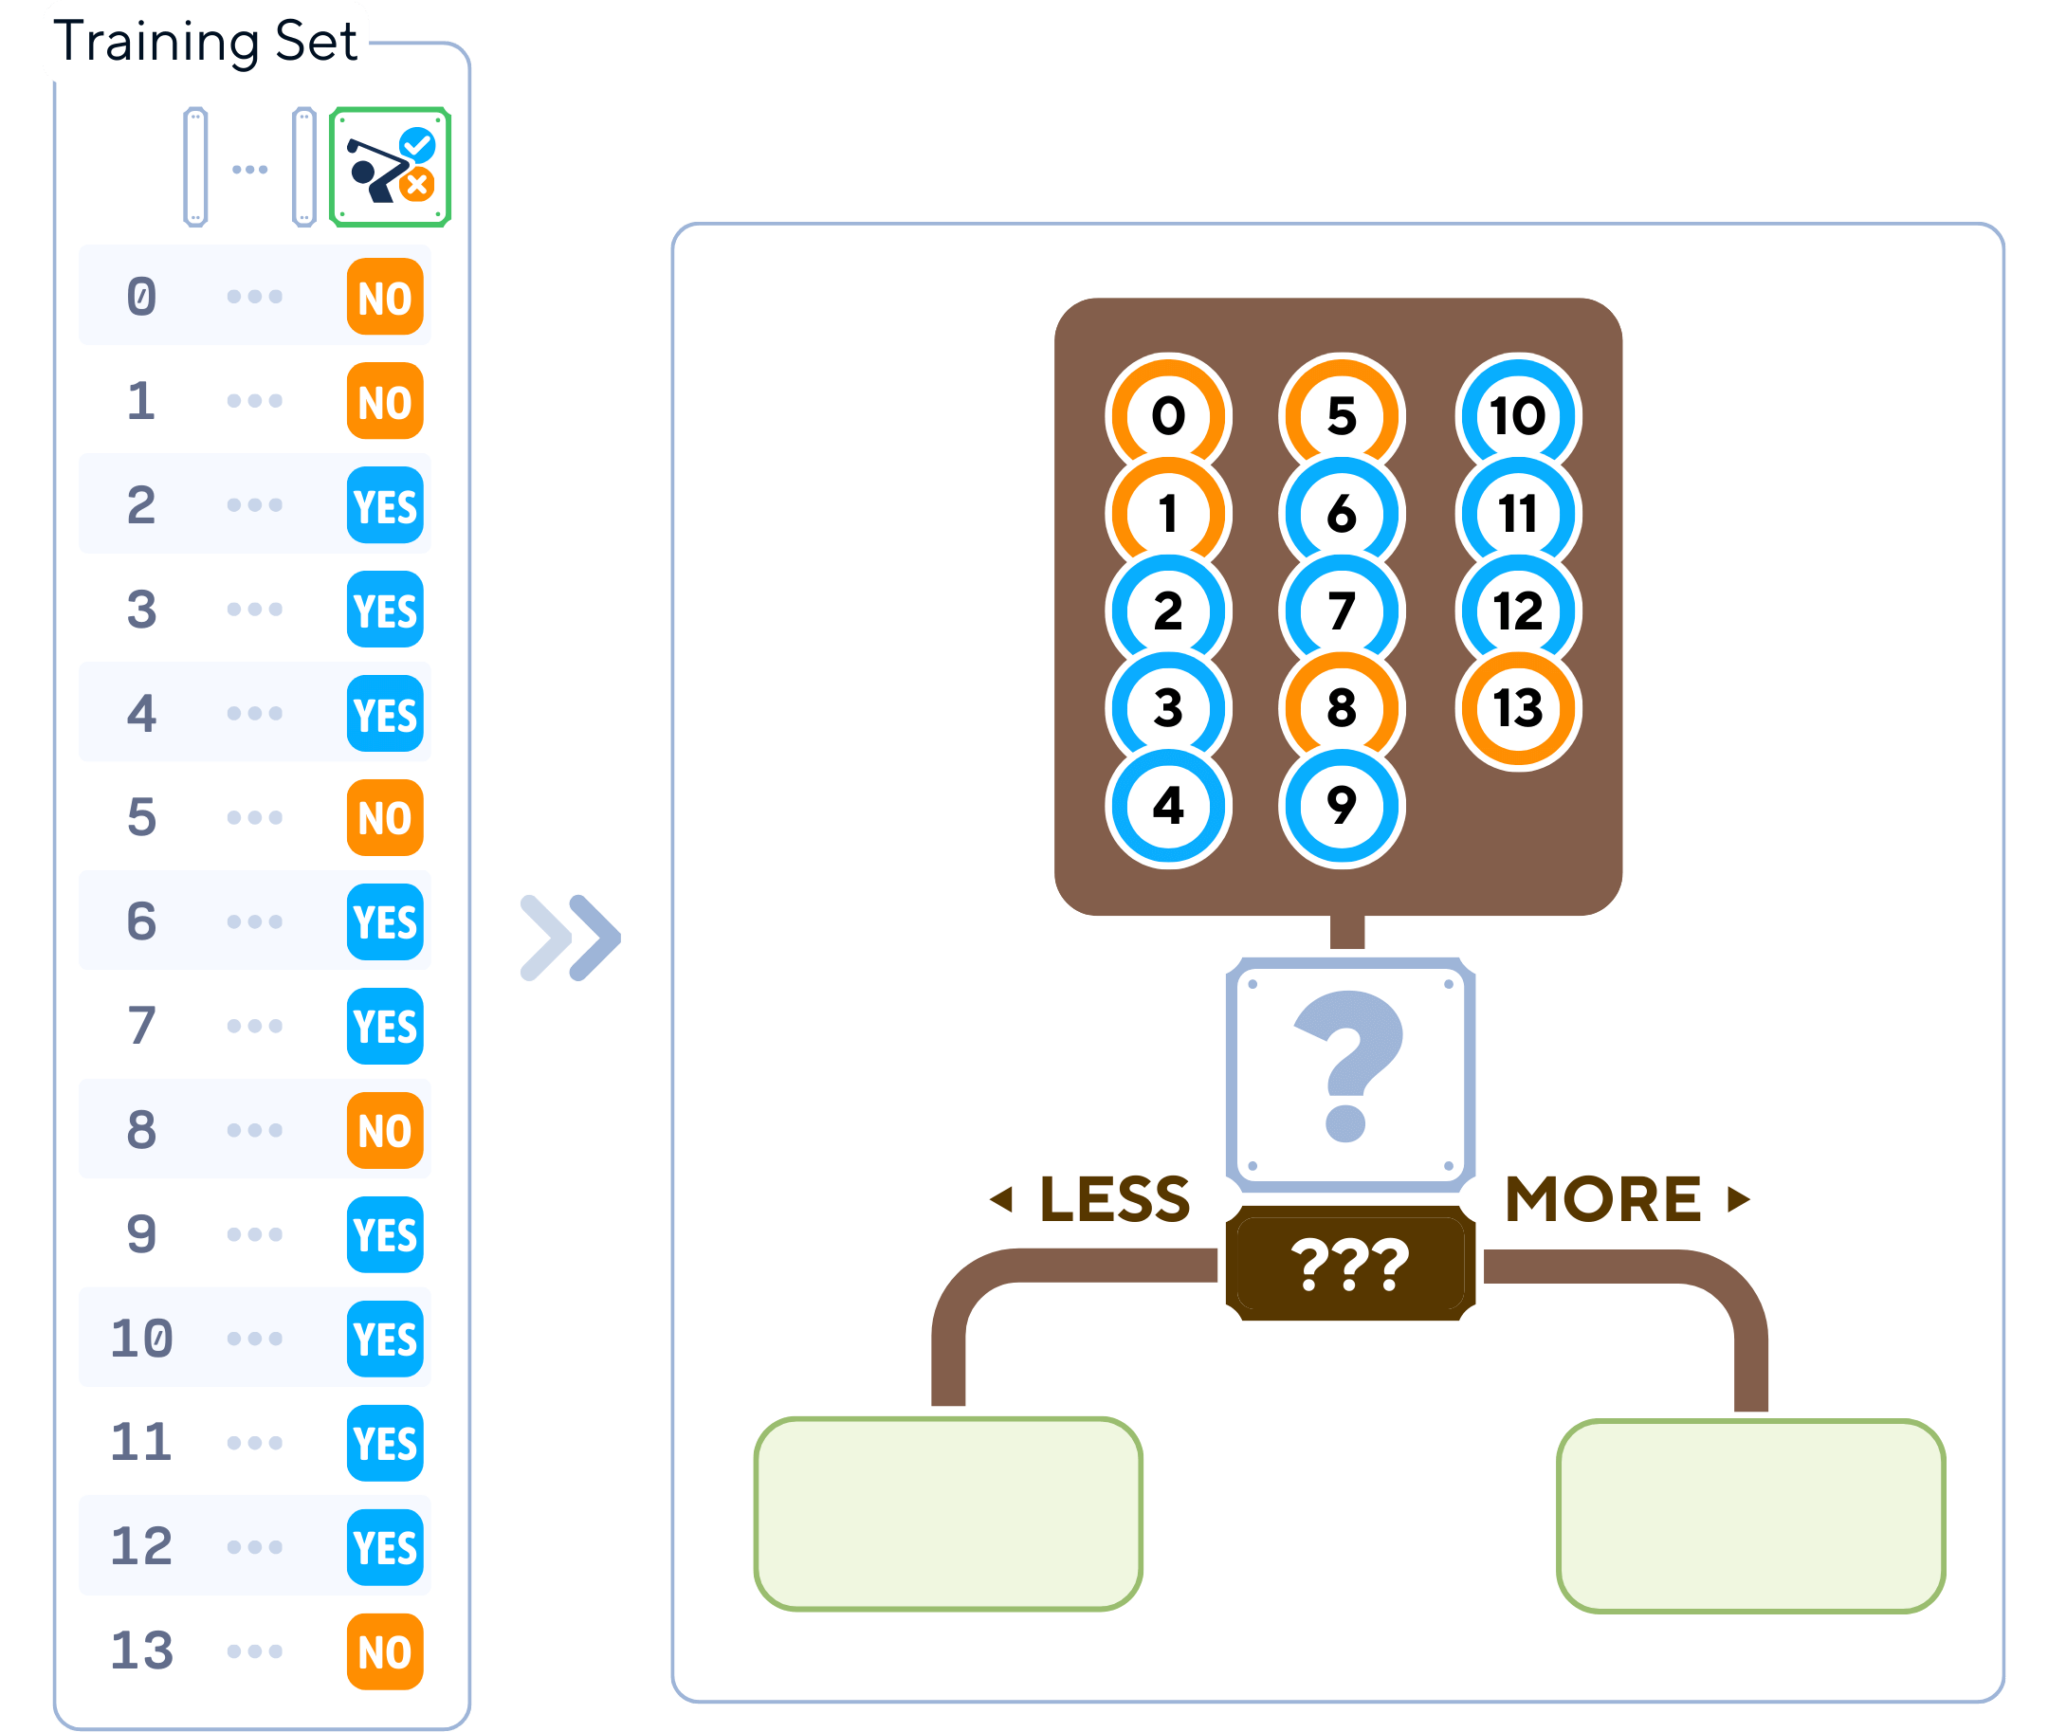

### 6.2. Para cada característica: 
- a. Ordene los valores de la característica. 
- b. Considere todos los umbrales posibles entre valores adyacentes como posibles puntos de división.

In [14]:
def potential_split_points(attr_name, attr_values):
    sorted_attr = np.sort(attr_values)  # ✅ 2a. Ordenar valores
    unique_values = np.unique(sorted_attr)
    split_points = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]  # ✅ 2b. Calcular umbrales entre valores adyacentes
    return {attr_name: split_points}

# ✅ 2. Para cada característica:
for column in X_train.columns:
    splits = potential_split_points(column, X_train[column])
    for attr, points in splits.items():
        print(f"{attr:11}: {points}")


sunny      : [np.float64(0.5)]
overcast   : [np.float64(0.5)]
rainy      : [np.float64(0.5)]
Temperature: [np.float64(64.5), np.float64(66.5), np.float64(68.5), np.float64(69.5), np.float64(70.5), np.float64(71.5), np.float64(73.5), np.float64(77.5), np.float64(80.5), np.float64(82.0), np.float64(84.0)]
Humidity   : [np.float64(67.5), np.float64(72.5), np.float64(76.5), np.float64(79.0), np.float64(82.5), np.float64(87.5), np.float64(92.5), np.float64(95.5)]
Wind       : [np.float64(0.5)]


Tu función `potential_split_points` implementa fielmente los pasos 1, 2a y 2b descritos en el texto. Representa correctamente la lógica de cómo un árbol de decisión analiza cada atributo continuo para decidir dónde podría dividirse.

### 6.3. Para cada punto de división potencial: 
- a. Calcule la impureza (p. ej., impureza de Gini) del nodo actual. 
- b. Calcule el promedio ponderado de las impurezas.

#### a. Calcule la impureza (p. ej., impureza de Gini) del nodo actual

In [15]:
def gini_impurity(y):
    p = np.bincount(y) / len(y)
    return 1 - np.sum(p**2)

✅ **Esto implementa directamente el cálculo de impureza de Gini**, que corresponde al **punto a**.
Se aplica sobre un conjunto ``y``, que representa etiquetas (``0 = No``, ``1 = Yes`` en tu caso).

#### b. Calcule el promedio ponderado de las impurezas.

In [16]:
def weighted_average_impurity(y, split_index):
    n = len(y)
    left_impurity = gini_impurity(y[:split_index])
    right_impurity = gini_impurity(y[split_index:])
    return (split_index * left_impurity + (n - split_index) * right_impurity) / n

✅ Esta función calcula el **promedio ponderado de las impurezas de los dos subconjuntos resultantes de una división**, lo cual corresponde exactamente al **punto b**.

- ``y[:split_index]``: subconjunto a la izquierda del umbral (nodo izquierdo).

- ``y[split_index:]``: subconjunto a la derecha del umbral (nodo derecho).

- Cada impureza se pondera por la cantidad de muestras que contiene cada nodo.




## 🧠 7. Evaluación del modelo

## 🌳🖼️ 8. Visualización del Árbol de Decisión

## 🧪📊 9. Ajuste de hiperparámetros (opcional)

## 📌 10. Conclusiones y análisis final

In [13]:
## 🧠 7. Evaluación del modelo
# Display results
print(pd.concat([X_train, y_train], axis=1), 'n')
print(pd.concat([X_test, y_test], axis=1))

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
0       1         0      0         85.0      85.0     0     0
1       1         0      0         80.0      90.0     1     0
2       0         1      0         83.0      78.0     0     1
3       0         0      1         70.0      96.0     0     1
4       0         0      1         68.0      80.0     0     1
5       0         0      1         65.0      70.0     1     0
6       0         1      0         64.0      65.0     1     1
7       1         0      0         72.0      95.0     0     0
8       1         0      0         69.0      70.0     0     1
9       0         0      1         75.0      80.0     0     1
10      1         0      0         75.0      70.0     1     1
11      0         1      0         72.0      90.0     1     1
12      0         1      0         81.0      75.0     0     1
13      0         0      1         71.0      80.0     1     0 n
    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
14    